In [1]:
# Initialize Otter
import otter
grader = otter.Notebook()

# Homework 7: Gradient Descent, Logistic Regression
## Due Date:  Wednedsay 7/29, 11:59 PM

## This Assignment

This assignment consists of 2 parts. In these parts, we will:

1. Implement gradient descent, and show how it can be used to minimize arbitrary functions, even including loss functions for non-linear models.
1. Fit a logistic regression model on NBA data.


Note that the first part of this assignment will use bold notation to represent vectors, i.e. $\mathbf{x}$.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the assignment, we ask that you **write your solutions individually**. If you do discuss the assignments with others please **include their names** in the cell below.

**Collaborators:** n/a

## Point Distribution
| Question | Points | 
|----------|--------|
| 1 | 1 |
| 2a | 2 |
| 2b | 2 |
| 3a | 2 |
| 3b | 2 |
| 3c | 1 |
| 4a | 1 |
| 4b | 1 |
| 4c | 1 |
| 5a | 1 |
| 5b | 1 |
| 5c | 1 |
| 6a | 1 |
| 6b | 1 |
| 6c | 1 |
| 6d | 1 |
| 7a | 1 |
| 7b | 1 |
| 7c | 1 |
| Total | 23 | 

# Part 1: Gradient Descent

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model

np.random.seed(42)
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context("talk")

# Set some parameters
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 16
np.set_printoptions(4)

# We will use plot_3d helper function to help us visualize gradients
from hw7_utils import plot_3d

%matplotlib inline

## Load Data
Load the data.csv file into a pandas dataframe.  
Note that we are reading the data directly from the URL address.

In [3]:
# Run this cell to load our sample data
part_1_data = pd.read_csv("https://github.com/DS-100/su20/raw/gh-pages/resources/assets/datasets/hw7_data.csv", index_col=0)
part_1_data.head()

,x,y
0,-5.000000,-7.672309
1,-4.966555,-7.779735
2,-4.933110,-7.995938
3,-4.899666,-8.197059
4,-4.866221,-8.183883


---
## A Simple Model
Let's start by examining our data and creating a simple model that can represent this data.

First, run the cell below to visualize our data.

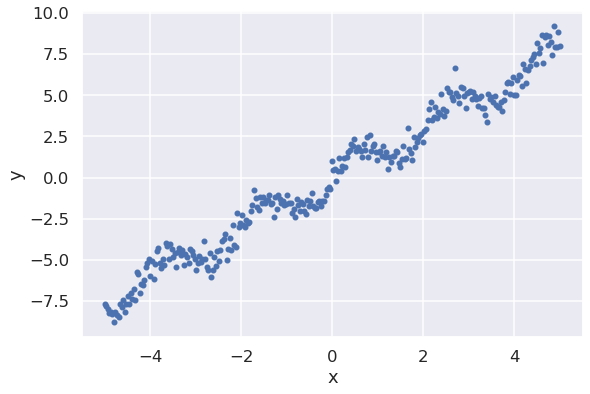

In [4]:
def scatter(x, y):
    """
    Generate a scatter plot using x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, marker='.')
    plt.xlabel('x')
    plt.ylabel('y')
    
x = part_1_data['x']
y = part_1_data['y']
scatter(x,y)

The data looks roughly linear, with some extra sinusoidal noise. For now, let's assume that the data follows some underlying linear model. We define the underlying linear model that predicts the value $y$ using the value $x$ as: $f_{\theta^*}(x) = \theta^* \cdot x$

Since we cannot find the value of the population parameter $\theta^*$ exactly, we will assume that our dataset approximates our population and use our dataset to estimate $\theta^*$. We denote an estimate with $\theta$ and the fitted estimated chosen based on the data as $\hat{\theta}$. Our parameterized model is:

$$\Large
f_{\theta}(x) = \theta \cdot x
$$

Based on this equation, we will define the linear model function `linear_model` below to estimate $\textbf{y}$ (the $y$-values) given $\textbf{x}$ (the $x$-values) and $\theta$.

In [5]:
def linear_model(x, theta):
    """
    Returns the estimate of y given x and theta

    Keyword arguments:
    x -- the vector of values x
    theta -- the scalar theta
    """
    return theta * x

In class, we learned that the squared loss function is smooth and continuous. Let's use squared loss to evaluate our estimate $\theta$, which we will use later to identify an optimal $\theta$, denoted $\hat{\theta}$. For several points, we compute the average loss or *empirical risk*.

In [6]:
def average_squared_loss(y, y_hat):
    """
    Returns the averge squared loss for observations y and predictions y_hat.

    Keyword arguments:
    y -- the vector of true values y
    y_hat -- the vector of predicted values y_hat
    """
    return np.mean((y - y_hat) ** 2)

Finally, we will visualize the average squared loss as a function of $\theta$, where several different values of $\theta$ are given.

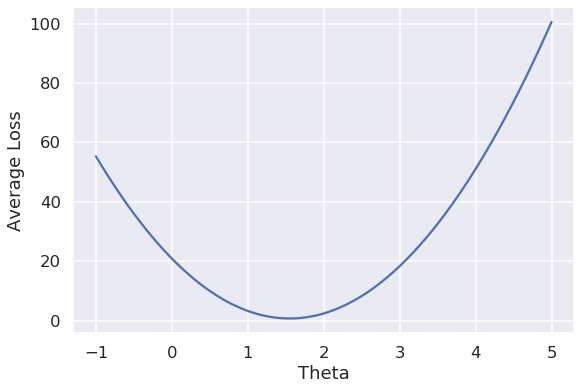

In [7]:
def visualize(x, y, thetas):
    """
    Plots the average l2 loss for given x, y as a function of theta.
    Use the functions you wrote for linear_model and l2_loss.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    thetas -- an array containing different estimates of the scalar theta
    """ 
    avg_loss = np.array([average_squared_loss(linear_model(x, theta), y) for theta in thetas])
    plt.figure(figsize=(8,6))
    plt.plot(thetas, avg_loss)
    plt.xlabel("Theta")
    plt.ylabel("Average Loss")
    
thetas = np.linspace(-1, 5, 70)
visualize(x, y, thetas)

You should notice that $\hat{\theta}$ is approximately 1.5. 

---
## Fitting our Simple Model
Now that we have defined a simple linear model and loss function, let's begin working on fitting our model to the data.

### Question 1
Let's confirm our visual findings for optimal $\hat{\theta}$.

Recall from homework 5 that the analytical solution for the optimal $\hat{\theta}$ for the average squared loss is: 

$$\hat{\theta} = \frac{\sum_{i=1}^n x_i y_i}{\sum_{i=1}^n x_i^2}$$

Now that we have the analytic solution for $\hat{\theta}$, implement the function `find_theta` that calculates the numerical value of $\hat{\theta}$ based on our data $\textbf{x}$, $\textbf{y}$.

<!--
BEGIN QUESTION
name: q1
points: 1
-->

In [8]:
def find_theta(x, y):
    """
    Find optimal theta given x and y

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    return np.sum(x * y) / np.sum(x**2)

theta_hat_simple = find_theta(x, y)
print(f'theta_hat = {theta_hat_simple}')

theta_hat = 1.5502648085962225


In [9]:
grader.check("q1")

All tests passed!

Now, let's plot our risk function again using the `visualize` function. But this time, we will add a vertical line at the optimal value of theta (plot the line $x = \hat{\theta}$).

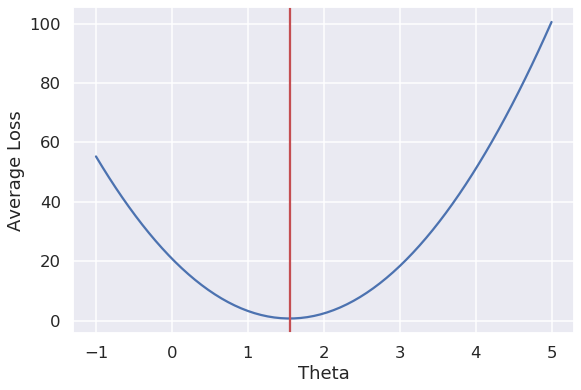

In [10]:
theta_opt = find_theta(x, y)
visualize(x, y, thetas)
plt.axvline(x=theta_opt, color='r');

We now have an optimal value for $\theta$ that minimizes the empirical risk. We can use the scatter plot of the data and add the line $f_{\hat{\theta}}(x) = \hat{\theta} \cdot \textbf{x}$ using the $\hat{\theta}$ computed above.

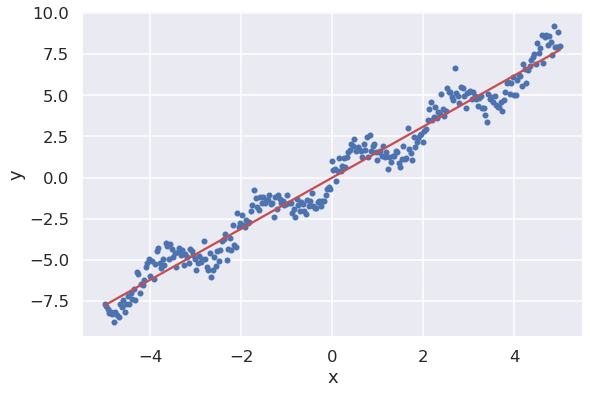

In [11]:
theta_opt_2 = find_theta(x, y)
scatter(x, y)
line_values = linear_model(x, theta_opt_2)
plt.plot(x, line_values, color='r');

Great! It looks like our estimator $f_{\hat{\theta}}(x)$ is able to estimate the average y for each x quite well using a single parameter $\theta$. 

The remaining data is known as the residual, $\textbf{r}=\textbf{y}-\hat{\theta} \cdot \textbf{x}$. Below, we find the residual and plot the residuals corresponding to $x$ in a scatter plot. We also plot a horizontal line at $y=0$ to assist visualization.

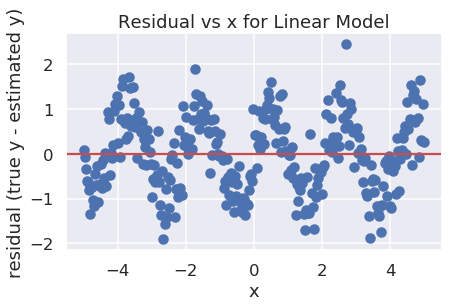

In [12]:
def visualize_residual(x, y):
    """
    Plot a scatter plot of the residuals, the remaining 
    values after removing the linear model from our data.

    Keyword arguments:
    x -- the vector of values x
    y -- the vector of values y
    """
    ...
    theta_hat = find_theta(x, y)
    y_sin = y - linear_model(x, theta_hat)
    plt.scatter(x, y_sin)
    plt.xlabel('x')
    plt.ylabel('residual (true y - estimated y)')
    plt.title('Residual vs x for Linear Model')
    plt.axhline(y=0, color='r')

visualize_residual(x, y)

## 2: Increasing Model Complexity

It looks like the remaining data is sinusoidal, meaning our original data follows a linear function and a sinusoidal function. Let's define a new model to address this discovery and find optimal parameters to best fit the data:

$$\Large
f_\boldsymbol\theta(x) = \theta_1x + sin(\theta_2x)
$$

Now, our model is parameterized by both $\theta_1$ and $\theta_2$, which we can combine in the vector, $\boldsymbol{\theta}$.

Note that a generalized sine function $a\sin(bx+c)$ has three parameters: amplitude scaling parameter $a$, frequency parameter $b$ and phase shifting parameter $c$. Looking at the residual plot above, it looks like the residual is zero at x = 0, and the residual swings between -1 and 1. Thus, it seems reasonable to effectively set the scaling and phase shifting parameter ($a$ and $c$ in this case) to 1 and 0 respectively. While we could try to fit $a$ and $c$, we're unlikely to get much benefit. When you're done with this assignment, you can try adding $a$ and $c$ to our model and fitting these values to see if you can get a better loss.

We define the `sin_model` function below that predicts $\textbf{y}$ (the $y$-values) using $\textbf{x}$ (the $x$-values) based on our new equation.

In [13]:
def sin_model(x, theta):
    """
    Predict the estimate of y given x, theta_1, theta_2

    Keyword arguments:
    x -- the vector of values x
    theta -- a vector of length 2, where theta[0] = theta_1 and theta[1] = theta_2
    """
    theta_1 = theta[0]
    theta_2 = theta[1]
    return theta_1 * x + np.sin(theta_2 * x)

<!-- BEGIN QUESTION -->

#### Question 2a

Recall the optimal value of $\theta$ should minimize our loss function. One way we've approached solving for $\theta$ is by taking the derivative of our loss function with respect to $\theta$, like we did in HW5.  

In the space below, use LaTeX to write/compute the following values:
* $R(\textbf{x}, \textbf{y}, \theta_1, \theta_2)$: our loss function, the empirical risk/mean squared error
* $\frac{\partial R }{\partial \theta_1}$: the partial derivative of $R$ with respect to $\theta_1$
* $\frac{\partial R }{\partial \theta_2}$: the partial derivative of $R$ with respect to $\theta_2$

Recall that $R(\textbf{x}, \textbf{y}, \theta_1, \theta_2) = \frac{1}{n} \sum_{i=1}^{n} (\textbf{y}_i - \hat{\textbf{y}_i})^2$

<!--
BEGIN QUESTION
name: q2a
manual: True
points: 2
-->

$R(x, y, \theta_1, \theta_2) = \frac{1}{n}\sum_{i=1}^n\left(y_i - \theta_1x - \sin\left(\theta_2x\right)\right)^2$

$\frac{\partial R}{\partial\theta_1} = -\frac{2}{n}\sum_{i=1}^nx\left(y_i - \theta_1x - \sin\left(\theta_2x\right)\right)$

$\frac{\partial R}{\partial\theta_2} = -\frac{2}{n}\sum_{i=1}^n\left(y_i - \theta_1x - \sin\left(\theta_2x\right)\right)\left(x\cos\left(\theta_2x\right)\right)$

<!-- END QUESTION -->

#### Question 2b
Now, implement the functions `sin_MSE`, `sin_MSE_dt1` and `sin_MSE_dt2`, which should compute $R$, $\frac{\partial R }{\partial \theta_1}$ and $\frac{\partial R }{\partial \theta_2}$ respectively. Use the formulas you wrote for $\frac{\partial R }{\partial \theta_1}$ and $\frac{\partial R }{\partial \theta_2}$ in the previous exercise. In the functions below, the parameter `theta` is a vector that looks like $( \theta_1, \theta_2 )$. We have completed `sin_MSE_gradient` for you.

Notes: 
* Keep in mind that we are still working with our original set of data, `part_1_data`
* To keep your code a bit more concise, be aware that `np.mean` does the same thing as `np.sum` divided by the length of the numpy array.

<!--
BEGIN QUESTION
name: q2b
points: 2
-->

In [14]:
def sin_MSE(theta):
    """
    Compute the numerical value of the l2 loss of our sinusoidal model given theta

    Keyword arguments:
    theta -- the vector of values theta
    """
    n = len(part_1_data)
    x = part_1_data["x"]
    y = part_1_data["y"]
    return (
            np.mean(
                (y - (
                    theta[0]*x + 
                    np.sin(theta[1]*x)
                ))**2
            )
    )

def sin_MSE_dt1(theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_1

    Keyword arguments:
    theta -- the vector of values theta
    """
    n = len(part_1_data)
    x = part_1_data["x"]
    y = part_1_data["y"]
    return (
            -2 * np.mean(
                (y - (
                    theta[0]*x + np.sin(theta[1]*x)
                )) * x
            )
    )
    
def sin_MSE_dt2(theta):
    """
    Compute the numerical value of the partial of l2 loss with respect to theta_2

    Keyword arguments:
    theta -- the vector of values theta
    """
    n = len(part_1_data)
    x = part_1_data["x"]
    y = part_1_data["y"]
    return (
            -2 * np.mean(
                (y - (
                    theta[0]*x + np.sin(theta[1]*x)
                )) * x * np.cos(theta[1]*x)
            )
    )

    
# This function calls dt1 and dt2 and returns the gradient dt. It is already implemented for you.
def sin_MSE_gradient(theta):
    """
    Returns the gradient of l2 loss with respect to vector theta

    Keyword arguments:
    theta -- the vector of values theta
    """
    x = part_1_data['x']
    y = part_1_data['y']     
    return np.array([sin_MSE_dt1(theta), sin_MSE_dt2(theta)])

In [15]:
grader.check("q2b")

All tests passed!

## 3: Gradient Descent

In lecture, we saw that there are a number of ways to optimize a linear model:

1. Brute force guess and check
2. Analytically derive a closed form solution
3. Use a numerical method like gradient descent

You can try to solve for the optimal $\hat{\mathbf{\theta}}$ analytically using your answers from 2a, but we don't recommend it. Notably, observe that the model is not even linear, e.g. it contains $\theta_2$ is inside a sine function.

To demonstrate how truly powerful techniques like gradient descent are, we'll use it in this assignment to optimize our nonlinear model.

### Question 3

Let's now implement gradient descent. 

Note that the function you're implementing here is somewhat different than the gradient descent function we created in lecture. The version in lecture was `gradient_descent(df, initial_guess, alpha, n)`, where `df` was the gradient of the function we are minimizing, `initial_guess` are the starting parameters for that function. Here our signature is a bit different (described below).

#### Question 3a
Implement the `grad_desc` function that performs gradient descent for a finite number of iterations. This function takes in an array for $\textbf{x}$ (`x`), an array for $\textbf{y}$ (`y`), and an initial value for $\theta$ (`theta`). `alpha` will be the learning rate (or step size, whichever term you prefer). In this part, we'll use a static learning rate that is the same at every time step, just like in lecture.

At each time step, use the gradient and `alpha` to update your current `theta`. Also at each time step, be sure to save the current `theta` in `theta_history`, along with the average squared loss (computed with the current `theta`) in `loss_history`.

After completing the function, the cell will output the trajectory of your algorithm as it executed.

Hints:
- Write out the gradient update equation (1 step). What variables will you need for each gradient update? Of these variables, which ones do you already have, and which ones will you need to recompute at each time step?
- You may need a loop here to update `theta` several times
- Recall that the gradient descent update function follows the form:
$$\large
\boldsymbol\theta^{(t+1)} \leftarrow \boldsymbol\theta^{(t)} - \alpha \left(\nabla_\boldsymbol\theta \mathbf{R}(\textbf{x}, \textbf{y}, \boldsymbol\theta^{(t)}) \right)
$$

<!--
BEGIN QUESTION
name: q3a
points: 2
-->

In [16]:
def init_b():
    """Creates an initial theta [0, 0] of shape (2,) as a starting point for gradient descent"""
    return np.zeros((2,))

def grad_desc(loss_f, gradient_loss_f, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and static learning rate

    Keyword arguments:
    loss_f -- the loss function to be minimized (used for computing loss_history)
    gradient_loss_f -- the gradient of the loss function to be minimized
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent
    loss_history -- the series of loss values over each iteration of gradient descent
    """
    theta_history = []
    loss_history = []
    
    for i in range(num_iter + 1):
        theta_history.append(theta)
        loss_history.append(sin_MSE(theta))
        theta = theta - (alpha * sin_MSE_gradient(theta))
    
    return theta, theta_history, loss_history

theta_start = init_b()
theta_hat, thetas_used, losses_calculated = grad_desc(sin_MSE, sin_MSE_gradient, theta_start, num_iter=20, alpha=0.1)
for b, l in zip(thetas_used, losses_calculated):
    print(f"theta: {b}, Loss: {l}")

theta: [0. 0.], Loss: 20.859191416422235
theta: [2.6011 2.6011], Loss: 9.285008173048674
theta: [0.9034 2.591 ], Loss: 4.680169273815365
theta: [2.0563 2.9631], Loss: 2.6242517936325824
theta: [1.1589 2.8669], Loss: 1.4765157174727768
theta: [1.7939 3.0728], Loss: 0.9073271435862446
theta: [1.3216 3.0015], Loss: 0.5415316432911281
theta: [1.6495 3.0291], Loss: 0.3775841142469479
theta: [1.4233 2.9882], Loss: 0.2969750688130759
theta: [1.583  3.0103], Loss: 0.2590425421375735
theta: [1.471  2.9893], Loss: 0.23973439443291847
theta: [1.5504 3.0017], Loss: 0.23034782416254634
theta: [1.4944 2.9914], Loss: 0.2255775832667723
theta: [1.5342 2.998 ], Loss: 0.22321772191904055
theta: [1.506  2.9929], Loss: 0.2220236396720403
theta: [1.526  2.9963], Loss: 0.2214281150026239
theta: [1.5119 2.9938], Loss: 0.22112776381775162
theta: [1.5219 2.9955], Loss: 0.22097741373654567
theta: [1.5148 2.9942], Loss: 0.2209017318568303
theta: [1.5198 2.9951], Loss: 0.2208637810584589
theta: [1.5163 2.9945], L

In [17]:
grader.check("q3a")

All tests passed!

#### Question 3b
Now, let's try using a decaying learning rate. Implement `grad_desc_decay` below, which performs gradient descent with a learning rate that decreases slightly with each time step. You should be able to copy most of your work from the previous part, but you'll need to tweak how you update `theta` at each time step.

By decaying learning rate, we mean instead of just a number $\alpha$, the learning should be now $\frac{\alpha}{i+1}$ where $i$ is the current number of iteration. (Why do we need to add a '+ 1' in the denominator?)

<!--
BEGIN QUESTION
name: q3b
points: 2
-->

In [18]:
def init_b():
    """Creates an initial theta [0, 0] of shape (2,) as a starting point for gradient descent"""
    return np.zeros((2,))

def grad_desc_decay(loss_f, gradient_loss_f, theta, num_iter=20, alpha=0.1):
    """
    Run gradient descent update for a finite number of iterations and decaying learning rate

    Keyword arguments:
    loss_f -- the loss function to be minimized (used for computing loss_history)
    gradient_loss_f -- the gradient of the loss function to be minimized
    theta -- the vector of values theta to use at first iteration
    num_iter -- the max number of iterations
    alpha -- the learning rate (also called the step size)
    
    Return:
    theta -- the optimal value of theta after num_iter of gradient descent
    theta_history -- the series of theta values over each iteration of gradient descent,
                     should include the starting and ending theta (i.e. num_iter + 1 items)
    loss_history -- the series of loss values over each iteration of gradient descent, 
                     should include the starting and ending theta (i.e. num_iter + 1 items)
    """
    theta_history = []
    loss_history = []
    
    for i in range(num_iter + 1):
        theta_history.append(theta)
        loss_history.append(sin_MSE(theta))
        alpha = alpha / (i + 1)
        theta = theta - (alpha * sin_MSE_gradient(theta))

    return theta, theta_history, loss_history

theta_start = init_b()
theta_hat_decay, thetas_used_decay, losses_calculated_decay =  grad_desc_decay(sin_MSE, sin_MSE_gradient, theta_start, num_iter=20, alpha=0.1)
for b, l in zip(thetas_used_decay, losses_calculated_decay):
    print(f"theta: {b}, Loss: {l}")

theta: [0. 0.], Loss: 20.859191416422235
theta: [2.6011 2.6011], Loss: 9.285008173048674
theta: [1.7522 2.596 ], Loss: 0.9288337694245621
theta: [1.7069 2.6273], Loss: 0.7633681858876231
theta: [1.6984 2.6348], Loss: 0.7330464290759641
theta: [1.6968 2.6363], Loss: 0.7273483828900508
theta: [1.6965 2.6365], Loss: 0.726409861207651
theta: [1.6965 2.6366], Loss: 0.7262760462559283
theta: [1.6965 2.6366], Loss: 0.7262593239844215
theta: [1.6965 2.6366], Loss: 0.7262574660178014
theta: [1.6965 2.6366], Loss: 0.7262572802218432
theta: [1.6965 2.6366], Loss: 0.7262572633313077
theta: [1.6965 2.6366], Loss: 0.7262572619237627
theta: [1.6965 2.6366], Loss: 0.72625726181549
theta: [1.6965 2.6366], Loss: 0.7262572618077561
theta: [1.6965 2.6366], Loss: 0.7262572618072403
theta: [1.6965 2.6366], Loss: 0.7262572618072078
theta: [1.6965 2.6366], Loss: 0.7262572618072064
theta: [1.6965 2.6366], Loss: 0.7262572618072064
theta: [1.6965 2.6366], Loss: 0.7262572618072064
theta: [1.6965 2.6366], Loss: 0.

In [19]:
grader.check("q3b")

All tests passed!

Let's visually inspect our results of running gradient descent to optimize $\boldsymbol\theta$. The code below plots our $x$-values with our model's predicted $\hat{y}$-values over the original scatter plot. You should notice that gradient descent successfully optimized $\boldsymbol\theta$.

In [20]:
b = init_b()
b_est, bs, loss = grad_desc(sin_MSE, sin_MSE_gradient, b)

b = init_b()
b_est_decay, bs_decay, loss_decay = grad_desc_decay(sin_MSE, sin_MSE_gradient, b)

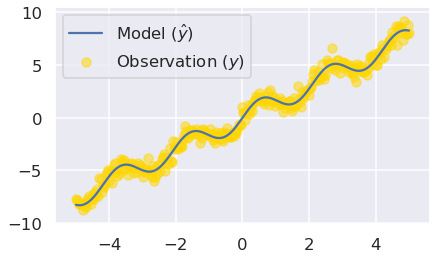

In [21]:
y_pred = sin_model(x, b_est)

plt.plot(x, y_pred, label='Model ($\hat{y}$)')
plt.scatter(x, y, alpha=0.5, label='Observation ($y$)', color='gold')
plt.legend();

Run the following cell to see a plot of the loss values over each iteration of gradient descent for both static learning rate and decaying learning rate. 

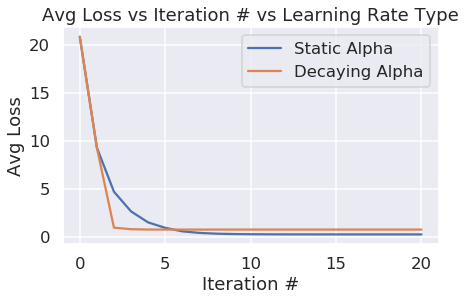

In [22]:
plt.plot(np.arange(len(loss)), loss, label='Static Alpha')
plt.plot(np.arange(len(loss)), loss_decay, label='Decaying Alpha')
plt.xlabel('Iteration #')
plt.ylabel('Avg Loss')
plt.title('Avg Loss vs Iteration # vs Learning Rate Type')
plt.legend();

---
## Visualizing Loss
Let's visualize our loss functions and gain some insight as to how gradient descent optimizes our model parameters.

In the previous plot we saw the loss decrease with each iteration. In this part, we'll see the trajectory of the algorithm as it travels the loss surface? Run the following cells to see visualization of this trajectory. 

In [23]:
bs = np.array(bs).squeeze()
bs_decay = np.array(bs_decay).squeeze()
loss = np.array(loss)
loss_decay = np.array(loss_decay)
bs

array([[0.    , 0.    ],
       [2.6011, 2.6011],
       [0.9034, 2.591 ],
       [2.0563, 2.9631],
       [1.1589, 2.8669],
       [1.7939, 3.0728],
       [1.3216, 3.0015],
       [1.6495, 3.0291],
       [1.4233, 2.9882],
       [1.583 , 3.0103],
       [1.471 , 2.9893],
       [1.5504, 3.0017],
       [1.4944, 2.9914],
       [1.5342, 2.998 ],
       [1.506 , 2.9929],
       [1.526 , 2.9963],
       [1.5119, 2.9938],
       [1.5219, 2.9955],
       [1.5148, 2.9942],
       [1.5198, 2.9951],
       [1.5163, 2.9945]])

In [24]:
# Run me to see a 3D plot (gradient descent with static alpha)
plot_3d(bs[:, 0], bs[:, 1], loss, average_squared_loss, sin_model, x, y)

In [25]:
# Run me to see another 3D plot (gradient descent with decaying alpha)
plot_3d(bs_decay[:, 0], bs_decay[:, 1], loss_decay, average_squared_loss, sin_model, x, y)

Another common way of visualizing 3D dynamics is with a _contour_ plot. Run the following cells.

In [26]:
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [27]:
def contour_plot(title, theta_history, loss_function, model, x, y):
    """
    The function takes the following as argument:
        theta_history: a (N, 2) array of theta history
        loss: a list or array of loss value
        loss_function: for example, l2_loss
        model: for example, sin_model
        x: the original x input
        y: the original y output
    """
    theta_1_series = theta_history[:,0] # a list or array of theta_1 value
    theta_2_series = theta_history[:,1] # a list or array of theta_2 value

    ## In the following block of code, we generate the z value
    ## across a 2D grid
    b1_s = np.linspace(np.min(theta_1_series) - 0.1, np.max(theta_1_series) + 0.1)
    b2_s = np.linspace(np.min(theta_2_series) - 0.1, np.max(theta_2_series) + 0.1)

    x_s, y_s = np.meshgrid(b1_s, b2_s)
    data = np.stack([x_s.flatten(), y_s.flatten()]).T
    ls = []
    for b1, b2 in data:
        l = loss_function(model(x, np.array([b1, b2])), y)
        ls.append(l)
    z = np.array(ls).reshape(50, 50)
    
    # Create trace of theta point
    # Create the contour 
    theta_points = go.Scatter(name="theta Values", 
                              x=theta_1_series, 
                              y=theta_2_series,
                              mode="lines+markers")
    lr_loss_contours = go.Contour(x=b1_s, 
                                  y=b2_s, 
                                  z=z, 
                                  colorscale='Viridis', reversescale=True)

    plotly.offline.iplot(go.Figure(data=[lr_loss_contours, theta_points], layout={'title': title}))

In [28]:
contour_plot('Gradient Descent with Static Learning Rate', bs, average_squared_loss, sin_model, x, y)

In [29]:
contour_plot('Gradient Descent with Decay Learning Rate', bs_decay, average_squared_loss, sin_model, x, y)

### Question 3c: Analyzing Learning Rates

<!-- BEGIN QUESTION -->

In 1-2 sentences, describe what you notice about the path that theta takes with a static learning rate vs. a decaying learning rate. In your answer, refer to either pair of plots above (the 3d plot or the contour plot).

<!--
BEGIN QUESTION
name: q3c
manual: true
points: 1
-->

Looking at the contour plot, the static learning rate seems to jump about between sides of the loss surface, creating a zigzag pattern that would be prone to overshooting. The decaying learning rate converges to a minimum much quicker (although the minimum has a higher MSE than that of the static rate).

<!-- END QUESTION -->



# Part 2: Logistic Regression

In this part of the assignment we will fit a logistic regression model on NBA data.

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['lines.linewidth'] = 3
sns.set() 

In [31]:
df = pd.read_csv('nba.csv')
df["WON"] = df["WL"]
df["WON"] = df["WON"].replace("W", 1)
df["WON"] = df["WON"].replace("L", 0)
df.head(5)

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,WON
0,22018,1610612744,GSW,Golden State Warriors,21800002,2018-10-16,GSW vs. OKC,W,240,42,...,58,28,7,7,21,29,108,8,1,1
1,22018,1610612760,OKC,Oklahoma City Thunder,21800002,2018-10-16,OKC @ GSW,L,240,33,...,45,21,12,6,15,21,100,-8,1,0
2,22018,1610612755,PHI,Philadelphia 76ers,21800001,2018-10-16,PHI @ BOS,L,240,34,...,47,18,8,5,16,20,87,-18,1,0
3,22018,1610612738,BOS,Boston Celtics,21800001,2018-10-16,BOS vs. PHI,W,240,42,...,55,21,7,5,15,20,105,18,1,1
4,22018,1610612750,MIN,Minnesota Timberwolves,21800010,2018-10-17,MIN @ SAS,L,240,39,...,46,20,9,2,11,27,108,-4,1,0


## Question 4: 1D Logistic Regression Model

In lecture we buit a logistic regression classifier for the NBA data loaded above. Specifically, our model took an observation $x$ and a parameter vector $\theta$ and used them to generate a prediction $\hat{y}$. Note that in this question we will assume that $x$ is a one-dimensional scalar.

In this case, our predictions represented the probability that the observation belonged to a specific category. In lecture the category was whether or not the team won. That is, $\hat{y} = P(Y = 1 | x)$, where $Y = 1$ indicates that the team we're observing won the game.

### Question 4a: Implementing a 1D Logistic Model

As discussed in lecture, the prediction of our model is $ \hat{y} = \sigma(x \hat{\theta})$. _Note: Here, both $x$ and $\hat{\theta}$ are scalars, not vectors._ 

In this part of the assignment we'll start by trying to build a model that predicts the winning probability as a function of the number of points that a team scored.

Below, first define `sigma` to be the sigmoid function we saw in lecture. Then, fill in `predicted_probability_of_winning_given_pts` so that it returns the correct prediction. Your function should work for both scalar and array arguments for `pts`. That is, `predicted_probability_of_winning_given_pts(100, 0.01)` should return a single value (0.731) and `predicted_probability_of_winning_given_pts(np.array([100, 110])), 0.01)` should return an array of values (0.731, 0.750). 

<!--
BEGIN QUESTION
name: q4a
points: 1
-->

In [32]:
def sigma(t):
    return 1 / (1 + np.exp(-t))

def predicted_probability_of_winning_given_pts(pts, theta):
    return sigma(pts * theta)

In [33]:
grader.check("q4a")

All tests passed!

### Exploring an Example Model

Suppose we pick $\hat{\theta}$ = 0.01. We can generate predictions for each of the games in our real world dataset as follows:

In [34]:
theta = 0.01
x = df["PTS"]
y_obs = df["WON"]
y_hat = predicted_probability_of_winning_given_pts(x, theta)

If we look at our predictions, we see that every team is given a greater than 50 percent prediction of winning based on their number of points. This suggests a problem with our model.

In [35]:
y_hat.mean()

0.7517679619807067

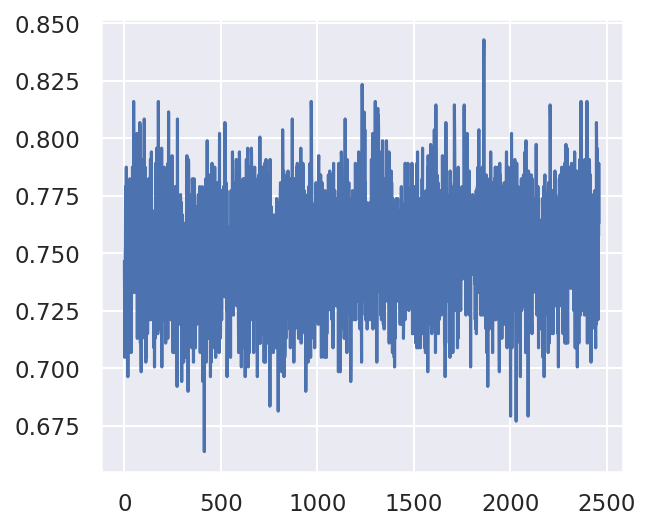

In [36]:
plt.plot(y_hat);

To understand what's going on, we make a plot of the prediction our model will make as a function of the number of points scored for $\hat{\theta} = 0.01$. 

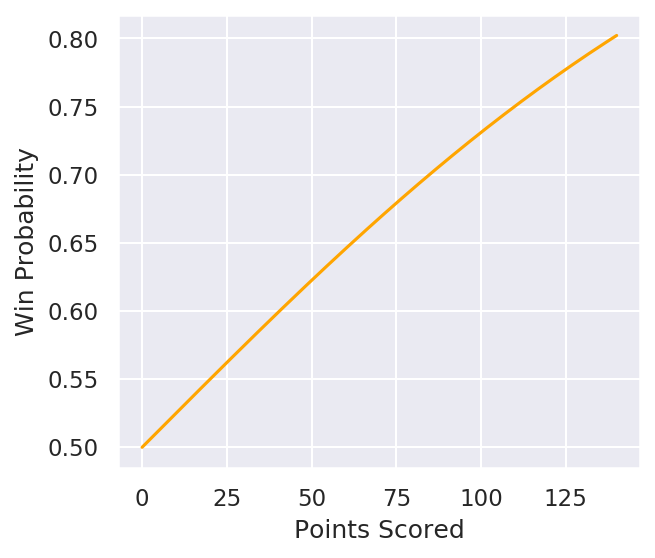

In [37]:
theta = 0.01
pts = np.linspace(0, 140, 140)
plt.plot(pts, predicted_probability_of_winning_given_pts(pts, theta), color = 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points Scored");

We can also provide the actual results from the NBA dataset as blue stars for comparison to our model.

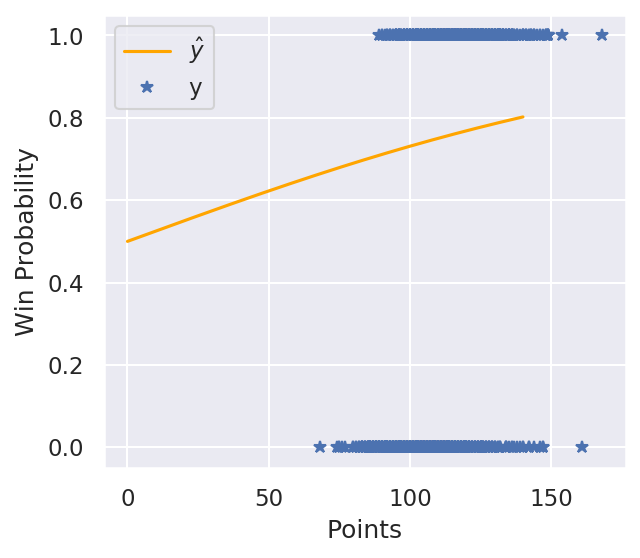

In [38]:
theta = 0.01
pts = np.linspace(0, 140, 140)
plt.plot(pts, predicted_probability_of_winning_given_pts(pts, theta), color = 'orange')
plt.plot(df[["PTS"]], df[["WON"]], 'b*')
plt.ylabel("Win Probability")
plt.xlabel("Points")
plt.legend(['$\hat{y}$', 'y']);

<!-- BEGIN QUESTION -->

### Question 4b

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 1
-->

Is this model reasonable? Why or why not?

It is not reasonable. If a team scores zero points, it is not reasonable to expect that said team would have a 50% chance of winning.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 4c

Try playing around with other theta values. You should observe that the models are all pretty bad, no matter what $\theta$ you pick. Explain why below.

<!--
BEGIN QUESTION
name: q4c
manual: true
points: 1
-->

We've failed to add an intercept term to $t$ in order to account for translation in the dataset. Suppose the probability "cusp" where losses and wins have equal probability is not at zero. Then the lack of an intercept term would grossly misrepresent the data since the model _assumes_ that the cusp is at zero.

<!-- END QUESTION -->



## Question 5: Adding an Intercept Term

If you observe your plot(s) from the previous question, you'll see that the chance of winning is always at least 0.5 under our model. This is unreasonable, e.g. suppose a team somehow scored only 36 points, they'd have no chance of winning in an NBA game.

### Implementing Logistic Regression with an Intercept Term

To deal with this, we should add another feature to our model. Specifically, we'll add a bias term, i.e. a feature that is equal to 1 for all observations. We've done this for you below.

In [39]:
points_and_bias = df[["PTS"]].copy()
points_and_bias["bias"] = np.ones(len(points_and_bias))
points_and_bias.head()

,PTS,bias
0,108,1.0
1,100,1.0
2,87,1.0
3,105,1.0
4,108,1.0


Logistic regression generalizes to multiple features in exactly the same manner as linear regression.

Recall that whereas linear regression on one parameter gave predictions $\hat{y} = x \hat{\theta}$, multiple linear regression gave predictions $\hat{y} = \vec{x} \cdot \vec{\hat{\theta}} = \vec{x}^T \vec{\hat{\theta}} = \sum_{i = 1}^p x_i \hat{\theta}_i$.

Logistic regression generalizes in exactly the same way. That is logistic regression in 1 variable is given by $\hat{y} = \sigma(x \hat{\theta})$, whereas multiple logistic regression is given by $\hat{y} = \sigma(\vec{x} \cdot \vec{\hat{\theta}}) = \sigma(\vec{x}^T \vec{\hat{\theta}}) = \sigma(\sum_{i = 1}^p x_i \hat{\theta}_i)$.

Fill in the function below so that it returns predictions as described above. As in the previous question, your model should be able to handle scalar and array arguments for x. For example `predicted_probability_of_winning_given_features(X.iloc[0:3, :], [0.1, -10])` should return a list (or series) (or numpy array) of the values `[0.6899744811276126, 0.5, 0.21416501695744153]`.

Your function only needs to work for array inputs to `x`. That is, your code does not need to work properly for `predicted_probability_of_winning_given_features(110, [0.1, -10])`

In [40]:
def predicted_probability_of_winning_given_features(X, theta):
    return sigma(X @ theta)

In [41]:
grader.check("q5a")

All tests passed!

### Exploring Logistic Regression with an Intercept Term

Now we have two parameters $\theta_1$ and $\theta_2$. Suppose $\theta_1 = 0.001$ and $\theta_2 = 2$. We can compute the predicted probability that each team won during each game as follows.

In [42]:
theta = np.array([0.001, 2])
predicted_probability_of_winning_given_features(points_and_bias.iloc[0:3, :], theta)

0    0.891678
1    0.890903
2    0.889633
dtype: float64

In [43]:
points_and_bias.iloc[0:3, :]

,PTS,bias
0,108,1.0
1,100,1.0
2,87,1.0


Now that we have a bias term, we have more freedom to adjust our model.

For example, if $\theta_1 = 0.05$ and $\theta_2 = -5$, we get the curve below. Here, the prediction of your model is $\sigma(\theta_1 \times PTS + \theta_2)$. That is, $\theta_1$ is the weight of `PTS`, and $\theta_2$ is the weight of the bias term.

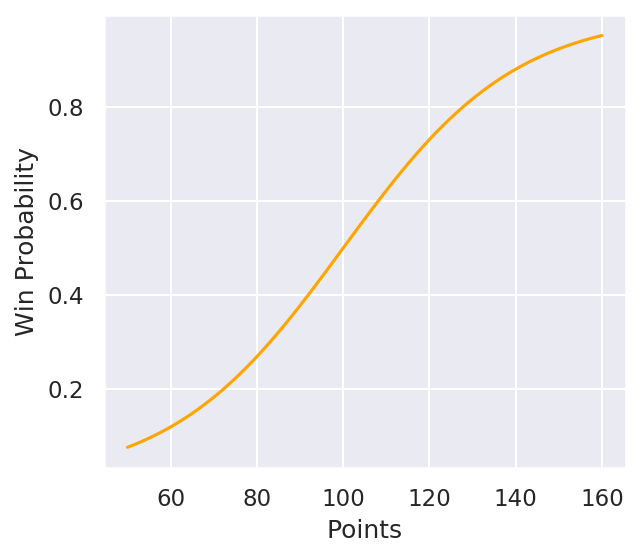

In [44]:
theta = [0.05, -5]
pts = np.linspace(50, 160, 111).reshape(-1, 1)
bias = np.ones(len(pts)).reshape(-1, 1)
point_range_and_bias = np.hstack((pts, bias))
plt.plot(pts, predicted_probability_of_winning_given_features(point_range_and_bias, theta), 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points");

And as before, we can also plot the actual data from our NBA dataset for comparison with our model.

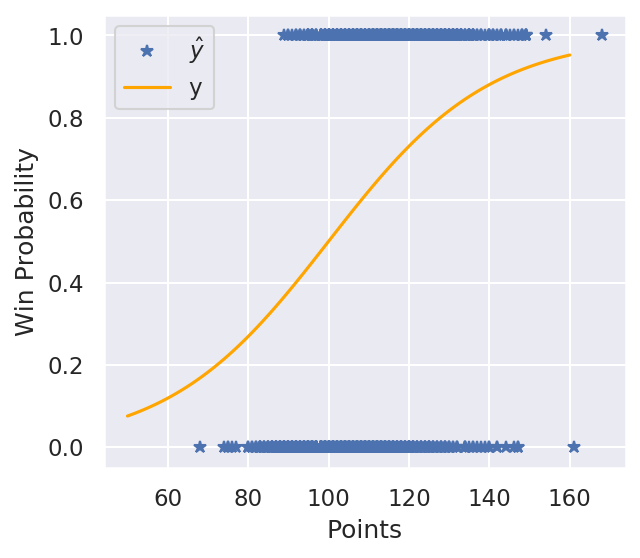

In [45]:
plt.plot(df["PTS"], df["WON"], 'b*')
theta = [0.05, -5]
pts = np.linspace(50, 160, 111).reshape(-1, 1)
bias = np.ones(len(pts)).reshape(-1, 1)
point_range_and_bias = np.hstack((pts, bias))
plt.plot(pts, predicted_probability_of_winning_given_features(point_range_and_bias, theta), 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points")
plt.legend(['$\hat{y}$', 'y']);

<!-- BEGIN QUESTION -->

### Question 5b

<!--
BEGIN QUESTION
name: q5b
manual: true
points: 1
-->
Using the plot above, try adjusting $\theta_2$ (only). Describe how changing $\theta_2$ affects the prediction curve. Provide your description in the cell below.

Changing $\theta_2$ adjusts the point where the logistic curve is $0.5$. That is, $\theta_2$ is the location where `class-0` and `class-1` (ie. losses and wins) have equal probability.

<!-- END QUESTION -->



### Question 5c
Now using the plot below try adjusting $\theta_1$ and $\theta_2$ such that you get a sharp curve that is centered at 100 points. In the cell below `theta` should be a list with your chosen values of $\theta_1$ and $\theta_2$.

- By "centered at 100 points", we mean that $\hat{y}$ should be equal to 0.5 when $x = 100$.
- By "sharp", we mean that the probability should be less than 5% percent for $x = 80$, and greater than 95% for $x = 100$.
- *Hint*: $\sigma(t) = 0.5$ when $t = 0$.

p(w | x=80) = 2.0611536181902037e-09
p(w | x=100) = 0.5


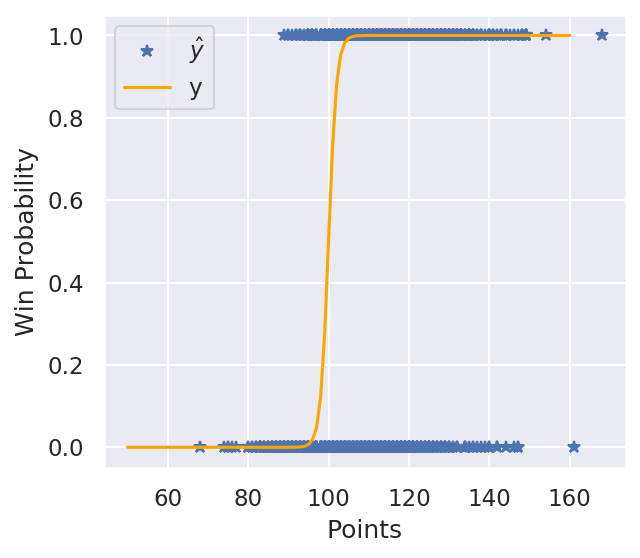

In [46]:
plt.plot(df["PTS"], df["WON"], 'b*')
theta = [1, -100]
pts = np.linspace(50, 160, 111).reshape(-1, 1)
bias = np.ones(len(pts)).reshape(-1, 1)
point_range_and_bias = np.hstack((pts, bias))
plt.plot(pts, predicted_probability_of_winning_given_features(point_range_and_bias, theta), 'orange')
plt.ylabel("Win Probability")
plt.xlabel("Points")
plt.legend(['$\hat{y}$', 'y']);
print(f"p(w | x=80) = {predicted_probability_of_winning_given_features(np.array([80, 1]), theta)}")
print(f"p(w | x=100) = {predicted_probability_of_winning_given_features(np.array([100, 1]), theta)}")

Provide your $\theta_1$ and $\theta_2$ in the cell below.
<!--
BEGIN QUESTION
name: q5c
points: 1
-->

In [47]:
theta1 = 1
theta2 = -100

In [48]:
grader.check("q5c")

All tests passed!

## Question 6: Optimizing Logistic Regresion

Let's now work towards finding the optimal theta $\vec{\hat{\theta}}$ for our given data.

_Note: In the previous question, we referred to our $\theta$s without a hat, since we had yet to find the optimal values of $\vec{\theta}$ procedurally._

### Question 6a: Calculating MSE

Create a function `mse_for_model_on_NBA_data(theta)` that takes in a value of $\vec{{\theta}}$ and returns the MSE on the dataset from above. You will first need to define the function `mse(y_obs, y_hat)` which finds the mean squared error between `y_obs` and `y_hat`.

**Hint:** You need to compute $\hat{y}$ using the given $\vec{\theta}$, then the mean squared error between $\hat{y}$ and the observed data $y$.

**Hint:** Use `points_and_bias` and `df["WON"]`.

In [49]:
def mse(y_obs, y_hat):
    return np.mean((y_obs - y_hat)**2)

def mse_for_model_on_NBA_data(theta):
    return mse(predicted_probability_of_winning_given_features(
                points_and_bias, theta),
              df["WON"])

In [50]:
grader.check("q6a")

All tests passed!

### Plotting MSE

The cell below plots your MSE function. We're providing this plot purely for your edification. Warning: This code can be pretty slow and might take a minute or two to run.

Note that the surface has a huge almost completely flat region. This means this loss function is very difficult to optimize.

In [51]:
import plotly.graph_objects as go

num_points = 50 # increase for better resolution, but it will run more slowly. 

if (num_points <= 100):

    uvalues = np.linspace(-0.3, 0.3, num_points)
    vvalues = np.linspace(-20, 20, num_points)
    (u,v) = np.meshgrid(uvalues, vvalues)
    thetas = np.vstack((u.flatten(),v.flatten()))

    MSE = np.array([mse_for_model_on_NBA_data(t) for t in thetas.T])

    loss_surface = go.Surface(x=u, y=v, z=np.reshape(MSE, u.shape))

    fig = go.Figure(data=[loss_surface])
    fig.update_layout(scene = dict(
        xaxis_title = "theta0",
        yaxis_title = "theta1",
        zaxis_title = "MSE"))
    fig.show()
else:
    print("Picking num points > 100 can be really slow. If you really want to try, edit the code above so that this if statement doesn't trigger.")

### Question 6b: Minimizing MSE

Using `scipy.optimize.minimize`, find the optimal $\vec{\hat{\theta}}$.  Give your answer as `theta_hat_1` and `theta_hat_2`. The resulting MSE should be less than 0.2.

Note: Your starting guess should be (0, 0). If you start somewhere over in the flat region like (0, 20), then scipy.optimize.minimize will get stuck.

Note: The test(s) for this question requires that you did the previous part correctly.

<!--
BEGIN QUESTION
name: q6b
points: 1
-->

In [52]:
from scipy.optimize import minimize

optimal_theta = minimize(mse_for_model_on_NBA_data, [0.0, 0.0])
theta_hat_1, theta_hat_2 = optimal_theta["x"]

In [53]:
grader.check("q6b")

All tests passed!

### Question 6c

Finally, let's try to understand how our model can be practically useful. As we'll see in lecture on 7/22, we often convert our logistic regression models into a concrete prediction by thresholding. That is, if our $\hat{y} \geq 0.5$, we say our prediction is that the team will win; otherwise, we say that we predict that we will lose. A simple way to do this is just to round our $\hat{y}$.

In [54]:
y_hat = predicted_probability_of_winning_given_features(points_and_bias, np.array([theta_hat_1, theta_hat_2])) 
games_and_predictions = df.copy()
games_and_predictions["predicted_to_win"] = np.round(y_hat)
games_and_predictions[["TEAM_NAME", "GAME_DATE", "WON", "predicted_to_win"]].tail(5)

,TEAM_NAME,GAME_DATE,WON,predicted_to_win
2455,Denver Nuggets,2019-04-10,1,0.0
2456,Orlando Magic,2019-04-10,1,1.0
2457,Charlotte Hornets,2019-04-10,0,1.0
2458,Memphis Grizzlies,2019-04-10,1,1.0
2459,Golden State Warriors,2019-04-10,0,1.0


To evaluate the quality of your model, compute the fraction of the rows of the table for which your model was able to correctly predict the outcome of the game based on only the points scored by one team. Assign this to the variable `percentage_correct`.

<!--
BEGIN QUESTION
name: q6c
points: 1
-->

In [55]:
percentage_correct = (
    games_and_predictions["WON"] ==
    games_and_predictions["predicted_to_win"]
).mean()

In [56]:
grader.check("q6c")

All tests passed!

### Question 6d

Recall that the surface for the MSE has a huge almost completely flat region, which means that the loss function is very difficult to optimize.

In lecture we talked about an alternate loss function called the cross-entropy loss that yielded a much nicer loss surface (no big flat regions). You will need to define the function `cel(y_obs, y_hat)` which calculates the cross-entropy loss betweeen `y_obs` and `y_hat`. Then, create a function `cel_for_model_on_NBA_data(theta)` that takes in a value of $\vec{{\theta}}$ and returns the cross-entropy loss on the dataset from the previous question.


**Hint:** Your code for this part should be very similar to your code for part a of this question.

<!--
BEGIN QUESTION
name: q6d
points: 1
-->

In [57]:
def cel(y_obs, y_hat):
    return -1 * np.mean(
        y_obs * np.log(y_hat) +
        (1 - y_obs) * np.log(1 - y_hat)
    )

def cel_for_model_on_NBA_data(theta):
    return cel(df["WON"], 
               predicted_probability_of_winning_given_features(
                   points_and_bias, theta
               )
              )

In [58]:
grader.check("q6d")

All tests passed!

### Plotting Cross-Entropy Loss

The cell below plots your cross-entropy loss function. Note that the surface has no big flat regions, which makes it easy to optimize.

Note: Feel free to ignore the divide by zero warning.

In [59]:
import plotly.graph_objects as go

num_points = 50 # increase for better resolution, but it will run more slowly. 

if (num_points <= 100):

    uvalues = np.linspace(-0.3, 0.3, num_points)
    vvalues = np.linspace(-20, 20, num_points)
    (u,v) = np.meshgrid(uvalues, vvalues)
    thetas = np.vstack((u.flatten(),v.flatten()))

    CEL = np.array([cel_for_model_on_NBA_data(t) for t in thetas.T])

    loss_surface = go.Surface(x=u, y=v, z=np.reshape(CEL, u.shape))

    fig = go.Figure(data=[loss_surface])
    fig.update_layout(scene = dict(
        xaxis_title = "theta0",
        yaxis_title = "theta1",
        zaxis_title = "CEL"))
    fig.show()
else:
    print("Picking num points > 100 can be really slow. If you really want to try, edit the code above so that this if statement doesn't trigger.")

/srv/conda/envs/data100/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning:

divide by zero encountered in log



## Question 7: Higher Dimensional Models

To wrap up this part of the assignment, let's try training a logistic regression model on all useful fields. Note we won't include the difference in the number of points between the two teams (given as PLUS_MINUS), otherwise the logistic regression will be right 100% of the time (since a team wins if and only if PLUS_MINUS > 0).

In [60]:
useful_numeric_fields = df.loc[:, 'FGM':'PTS'].copy()
useful_numeric_fields["BIAS"] = np.ones(len(useful_numeric_fields))
useful_numeric_fields.head(5)

,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,BIAS
0,42,95,0.442,7,26,0.269,17,18,0.944,17,41,58,28,7,7,21,29,108,1.0
1,33,91,0.363,10,37,0.270,24,37,0.649,16,29,45,21,12,6,15,21,100,1.0
2,34,87,0.391,5,26,0.192,14,23,0.609,6,41,47,18,8,5,16,20,87,1.0
3,42,97,0.433,11,37,0.297,10,14,0.714,12,43,55,21,7,5,15,20,105,1.0
4,39,91,0.429,6,19,0.316,24,27,0.889,14,32,46,20,9,2,11,27,108,1.0


### Question 7a
Using the ideas from earlier in this part of the assignment, find `theta_19_hat`, which should be a numpy array of length 19 that minimizes the MSE. For this, your starting guess should be a vector of 19 zeros. If you start from a random vector, scipy minimize will probably get stuck. The mean squared error for your model should be less than 0.12. You will need to define a function `mse_for_model_on_full_data(theta)` similar to the `mse_for_model_on_NBA_data(theta)` function earlier in this part of the assignment.

<!--
BEGIN QUESTION
name: q7a
points: 1
-->

In [61]:
def mse_for_model_on_full_data(theta):
    return np.mean(
        (sigma(useful_numeric_fields @ theta) - 
        df["WON"])**2
    )
    
theta_19_hat = minimize(mse_for_model_on_full_data, np.zeros(19))["x"]
mse_for_model_on_full_data(theta_19_hat)

0.10736591608669523

In [62]:
grader.check("q7a")

All tests passed!

You should see that `mse_for_model_on_full_data(theta_19_hat)` is less than 0.12.

### Question 7b

Compute `frac_19_correct`, which should be equal to the fraction of predictions which are correct given this new model. You should be able to get at least 84% accuracy.

<!--
BEGIN QUESTION
name: q7b
points: 1
-->

In [63]:
frac_19_correct = (
    df["WON"] ==
    np.round(sigma(useful_numeric_fields @ theta_19_hat))
).mean()
frac_19_correct

0.8434959349593496

In [64]:
grader.check("q7b")

All tests passed!

<!-- BEGIN QUESTION -->

### Question 7c

Look at the coefficients in `theta_19_hat` and identify which of the parameters have the biggest effect on the prediction. For this, you might find useful_numeric_fields.columns useful. Which attributes have the biggest positive effect on a team's success? The biggest negative effects? Do the results surprise you?

<!--
BEGIN QUESTION
name: q7c
manual: true
points: 1
-->

It seems that the parameter `FG_PCT` has a very large negative effect on the prediction by an order of magnitude more than the next most negative prediction. Conversely, the most positive parameter is `FG3_PCT`, which is still an order of magnitude less than that of `FG_PCT`. The difference in magnitudes is not that suprising considering that the parameters may be normalised to different maximimums and minimums. As someone not _that_ into basketball, the other parameters are somewhat meaningless to me, and as such I am not in a position to pass judgement on the results. However, it would be prudent to show these coefficients to someone more well-versed in matters of basketball as a form of sanity check to make sure that the model is not overfitting.

In [65]:
list(zip(theta_19_hat, useful_numeric_fields.columns))

[(2.124692759922619, 'FGM'),
 (-0.451172059747732, 'FGA'),
 (-21.90165000882123, 'FG_PCT'),
 (0.923445802180814, 'FG3M'),
 (-0.003558515378822562, 'FG3A'),
 (2.724898268191739, 'FG3_PCT'),
 (0.8830998065270763, 'FTM'),
 (-0.07165227422286279, 'FTA'),
 (2.1079984185261127, 'FT_PCT'),
 (0.30519224478702595, 'OREB'),
 (0.32588261293925896, 'DREB'),
 (0.048336404992882574, 'REB'),
 (0.0195557693456402, 'AST'),
 (0.38725654011094396, 'STL'),
 (0.06964299113447128, 'BLK'),
 (-0.3111864224106059, 'TOV'),
 (-0.05578939650320456, 'PF'),
 (-0.7549816715563751, 'PTS'),
 (5.193195623381068, 'BIAS')]

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [66]:
grader.check_all()

q1:

    All tests passed!
    

q2b:

    All tests passed!
    

q3a:

    All tests passed!
    

q3b:

    All tests passed!
    

q4a:

    All tests passed!
    

q5a:

    All tests passed!
    

q5c:

    All tests passed!
    

q6a:

    All tests passed!
    

q6b:

    All tests passed!
    

q6c:

    All tests passed!
    

q6d:

    All tests passed!
    

q7a:

    All tests passed!
    

q7b:

    All tests passed!

## Submission

Make sure you have run all cells in your notebook in order before     running the cell below, so that all images/graphs appear in the output. The cell below will generate     a zipfile for you to submit. **Please save before exporting!**

In [67]:
# Save your notebook first, then run this cell to export your submission.
grader.export()